# Srushti J. Raut.

In [40]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
import scipy
from sklearn.linear_model import LinearRegression
sn.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Simple Linear Regression

### Percentage obtained by Student based on study hours.

In [41]:
# Importing the Data

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
x = data['Hours']
y = data['Scores']


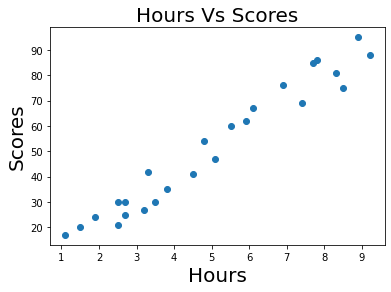

In [6]:
plt.scatter(x,y)
plt.title('Hours Vs Scores', fontsize = 20)
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

#### From the above graph, we can observe that there exist positive linear relationship between the number of hours studied and the scores obtained.



## Preparing the Data

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2, random_state = 365)

### Training the Algorithm


In [27]:
x_train_matrix=x_train.values.reshape(-1,1)
x_test_matrix=x_test.values.reshape(-1,1)
reg = LinearRegression()
reg.fit(x_train_matrix, y_train)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

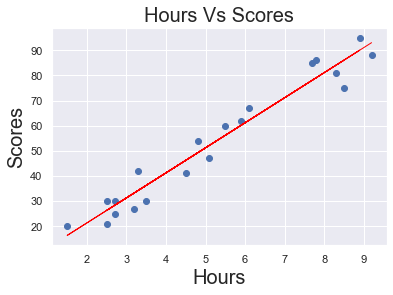

In [28]:
plt.scatter(x_train, y_train)
yhat = reg.coef_*x_train_matrix+reg.intercept_
fig = plt.plot(x_train_matrix, yhat, lw=1, c= 'red')
plt.title('Hours Vs Scores', fontsize = 20)
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show


In [30]:
X = sm.add_constant(x_train)
results = sm.OLS(y_train, X).fit()
df = pd. DataFrame({'R-squared':reg.score(x_train_matrix, y_train), 'Coefficient':reg.coef_, 'Intercept':reg.intercept_})
results.summary(), df

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 Scores   R-squared:                       0.950
 Model:                            OLS   Adj. R-squared:                  0.948
 Method:                 Least Squares   F-statistic:                     344.9
 Date:                Fri, 18 Dec 2020   Prob (F-statistic):           3.45e-13
 Time:                        21:28:03   Log-Likelihood:                -62.440
 No. Observations:                  20   AIC:                             128.9
 Df Residuals:                      18   BIC:                             130.9
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

#### 1. According to Statsmodel summary table, R-Squared is 95% and Adjusted R-Squared is 94.8%.
#### 2. According to Sklearn, R-Squared is also 95%.

In [ ]:
# Making Predictions

y_predicted = reg.predict(x_test_matrix)
y_predicted

In [ ]:
# Comparing Actual Vs Predicted Values

comparing = pd.DataFrame({'Actual':y_test, 'Predictions':y_predicted})
comparing

In [ ]:
# Evaluating Performance of the Model

print('Mean Squared Error =', metrics.mean_squared_error(y_test, y_predicted))
print('Mean Absolute Error =', metrics.mean_absolute_error(y_test, y_predicted))

In [38]:
Hours = 9.25
Z = pd.DataFrame({'Hours':[9.25]}).values.reshape(-1,1)
PREDICTIONS = pd.DataFrame({'No. of Hours':[Hours], 'Predicted Score': reg.predict(Z)})
PREDICTIONS

,No. of Hours,Predicted Score
0,9.25,93.528717


#### If the student studies for 9.25 hrs/day, then the predicted score is 93.528.